# Pretty Problems
### A Visualization of Consumer Complaints by Kinjal Shah & Vaidehi Mehta

Consumer complaints are the most effective way to improve product/service quality. Keeping track of client complaints allows you to improve the customer experience.
The dataset on which our study is based is a collection of consumer loan service complaints that have been lodged with the companies for response. The reason behind choosing this dataset was as we began our graduate studies during a pandemic, we were presented with numerous financial hurdles. As graduate students who began their studies during the pandemic, we understand how difficult it is to find answers to questions and solutions to problems. We understood that by identifying the weak places in a company's services, we would be able to create recommendations for them and assist them in improving their services.

Our work attempts to understand the patterns of consumer complaints before the pandemic and during the pandemic. Using the visualizations, a user can understand the difference in both the trends. These visualizations will also help people who want to understand how companies operate in different state and how their consumer experience has been in terms of timely responses of their complaints. These can also be used to design recommendations for the companies and authorities to smoothen the consumer experience.

Name of the dataset :  Consumer Complaints 

Where did we obtain the dataset from : https://www.consumerfinance.gov/data-research/consumer-complaints/

Where can you get the data from : https://www.consumerfinance.gov/data-research/consumer-complaints/#download-the-data

In [1]:
!pip install -r requirements.txt

In [2]:
# conda install seaborn

In [3]:
# conda install plotly

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mplt
import seaborn as sns
import ipywidgets
myLabel=ipywidgets.Label() #defining a label element
import plotly
import plotly.express as px
from plotly.offline import init_notebook_mode, plot, iplot
from plotly import tools
import plotly.graph_objs as go
from warnings import filterwarnings
filterwarnings('ignore')
import bqplot
from bqplot import Tooltip

In [5]:
data = pd.read_csv("complaints_dataset.csv")
data['year'] = pd.DatetimeIndex(data['Date received']).year #derive a new column 'year' from column 'Date received'
data = data.astype({'year':'float'})  #convert its datatype to float

data['complaints_per_year'] = data.groupby("year")['Issue'].count()
data = data.astype({'complaints_per_year':'float'})
#Here we group our Issue reported by Year to get the count of complaints received for each year. 
#Since it is a categorical dataset, only way to count the number of complaints we had to group by a categorical 
#column like Issue for the count.

data['complaints_per_year']  = data['complaints_per_year'].fillna(0)
#change the NaN values to zero to prevent from getting value error in our plots.

data.head()

Date received        Product                                Issue  \
0        1/1/16  Consumer Loan           Managing the loan or lease   
1        1/2/16  Consumer Loan           Managing the loan or lease   
2        1/3/16  Consumer Loan  Problems when you are unable to pay   
3        1/3/16   Student loan                       Getting a loan   
4        1/3/16  Consumer Loan         Taking out the loan or lease   

                            Company State Submitted via Date sent to company  \
0                         VW Credit    CA           Web               1/1/16   
1               ALLY FINANCIAL INC.    NY           Web               1/2/16   
2                    CITIBANK, N.A.    NJ           Web               1/6/16   
3              Social Finance, Inc.    MI           Web               1/7/16   
4  ONEMAIN FINANCIAL HOLDINGS, LLC.    SC           Web               1/5/16   

      Company response to consumer Timely response?    year  \
0  Closed with non-monetary relief              Yes  2016.0   
1          Closed with explanation              Yes  2016.0   
2          Closed with explanation              Yes  2016.0   
3          Closed with explanation              Yes  2016.0   
4          Closed with explanation              Yes  2016.0   

   complaints_per_year  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

#### About each column of the dataset:
  - This is a categorical dataset and values in all the coulmns are strings. Below is the brief insights about the columns in the dataset.
- Date received: This column gives us the date on which the consumer filed complaint with the Consumer Financial Protection Bureau
- Product: This column contains the name of the product/service consumers had issue with
- Issue: This column contains text. It is decribing the issue that consumer was facing
- Company: This is the name of the company of the product that the consumer was facing issue with
- State: This contains the state in which complaint was filed
- Submitted via: This column consists of all the platforms through which these complaints were filed
- Date sent to company: As the name suggests, this column contains the date on which the complaints were sent to the companies by the bureau
- Company response to consumer: Exactly as the name of the column, it contains the responses
- Timely response?: This is an interesting column which tells whether company addressed the complaint in time or not

In [6]:
pivot_data = pd.pivot_table(data, values='complaints_per_year', index='Product',
                    columns='year', aggfunc='count')
#Here we pivot our data to categorize it based on each product for which the complaints over the period 2016-2021
#were received and then aggregate it based on count of Issues reported per year for different products.

import bqplot
from bqplot import Tooltip
import ipywidgets
myLabel=ipywidgets.Label() #defining a label element

def on_selected(change):
    if len(change['owner'].selected) == 1: # only allow user to select one bin
        i,j = change['owner'].selected[0]
        print(i,j)
        v = pivot_data.iloc[i,j]
        print('Count Data Value for Selection:',v)
        myLabel.value = 'Issues reported for a product in an year: ' + str(v)
        
        pivot_data2 = pivot_data[pivot_data.index.str.contains(pivot_data.index[i])]
        pivot_data3 = pivot_data2.loc[: , pivot_data.columns[j]]
        pivot_data4 = data[data['Product'] == pivot_data3.index.values[0]]
        
        # aggregated_data
        #list_company = data['Company']
        aggregated_data = pd.DataFrame(pivot_data4.groupby('year')['complaints_per_year'].count())
        bar_chart  = plt.bar(x = aggregated_data.index, y= aggregated_data["complaints_per_year"], height=0.4)
        plt.xlabel("Year")
        plt.ylabel("Complaints_per_year")
        

col_sc = bqplot.ColorScale(scheme="Blues")
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

#Axis
ax_col = bqplot.ColorAxis(scale = col_sc, orientation='vertical', side='right') 
ax_x = bqplot.Axis(scale = x_sc) # same x/y ax we had before
ax_y = bqplot.Axis(scale = y_sc, orientation='vertical')

#Mark heatmap changes here
heat_map = bqplot.GridHeatMap(color = np.log10(pivot_data.to_numpy()), 
                              row = pivot_data.index,
                              column = pivot_data.columns,
                              scales = {'color':col_sc, 
                                        'row':y_sc, 'column':x_sc},
                             interactions={'click':'select'},
                             anchor_style={'fill':'blue'},
                             selected_style={'opacity':1.0},
                             unselected_style={'opacity':0.8})

#Interactions - action occurs on selection
heat_map.observe(on_selected, 'selected')
myLabel = ipywidgets.Label()

fig = bqplot.Figure(marks = [heat_map], axes=[ax_col, ax_x, ax_y])

# combine the widget & figure and display both at the same time!
myDashboard = ipywidgets.VBox([myLabel, fig])


#Code for bar chart: Total count of complaints over the years for the selected product
from bqplot import pyplot as plt

aggregated_data = pd.DataFrame(data.groupby('year')['Issue'].count())
fig1 = plt.figure(title="Complaints per year")

fig1.layout.height = "400px"
fig1.layout.width = "600px"

bar_chart  = plt.bar(x = aggregated_data.index, y= aggregated_data["Issue"])

bar_chart.colors = ["blue"]


plt.xlabel("Year")
plt.ylabel("Number of Complaints")

#Finally the the dashboard!
fig.layout.min_width='500px'
fig1.layout.min_width = '500px'
figures = ipywidgets.HBox([fig, fig1])

dashboard = ipywidgets.VBox([myLabel, figures])
dashboard

### Brief explantion of the above visualization

The above heatmap represents total number of issues reported for different products between years 2016 to 2021.
A single cell in the heatmap gives us a value that is the count of complaints received in that year for that particular product. 
By selecting a cell in heatmap, corresponding histogram/bar chart updates giving us the value of complaints received for that product per year as the result printed below the graphs.

The red bars in the bar chart represent the total number of complaints received in that year for all products and the blue bars represent the number of complaints received in that year for the selected product corresponding that cell.

This interactive dashboard would provide Year on Year trend of complaints received for diffrent financial products hence helping the user to gain insight into the data.

In [7]:
column=data['Product'].unique()

dd=ipywidgets.Dropdown(options=column, value=column[0],description="Select Product")

from ipywidgets import interact
def countplot1(column):
    mplt.figure(figsize=(60,30))
    mplt.subplot(1,2,1)
    data1 = data.loc[data['Product'] == column]
    data2 = data.loc[data['Product'] == column]
    p=sns.countplot(x=data1['Submitted via'])
    mplt.title('Number of complaints submitted through different platforms',fontsize = 40)
    p.set_xlabel("Complaints Submitted Via", fontsize = 40)
    mplt.xticks(fontsize=30)
    mplt.yticks(fontsize=30)
    mplt.subplot(1,2,2)
    p=sns.countplot(y=data2['State'])
    mplt.title('Number of complaints received for each product/services',fontsize = 40)
    p.set_xlabel("Products", fontsize = 40)
    mplt.xticks(fontsize=20)
    mplt.yticks(fontsize=30)
    
    
interact(countplot1,column=dd)

interactive(children=(Dropdown(description='Select Product', options=('Consumer Loan', 'Student loan', 'Payday…

<function __main__.countplot1(column)>

### A little about the above viz!

As we can observe in the above visualization, we have a dropdown window for the different types of financial product/services that were noted to have had complaints against. As we select different products in the dropdown, we see difference in the State wise trends on the number of complaints received for that product along with the dominant submission platform through which that product received the complaint. So for example, when we select 'Student Loan' as the product, we see that maximum number of complaints for 'Student Loan' were submitted through the 'web' and maximum complaints were reported in the state of California. Whereas, when we select 'Payday loan, title loan...' as the product, we see that 'United states minor outlying islands' is added to the y-axis of our state wise coumplaint count. 



# Contextual Visualizations
### Understand the data better!

# Products receiving most complaints during the years 2016-2018
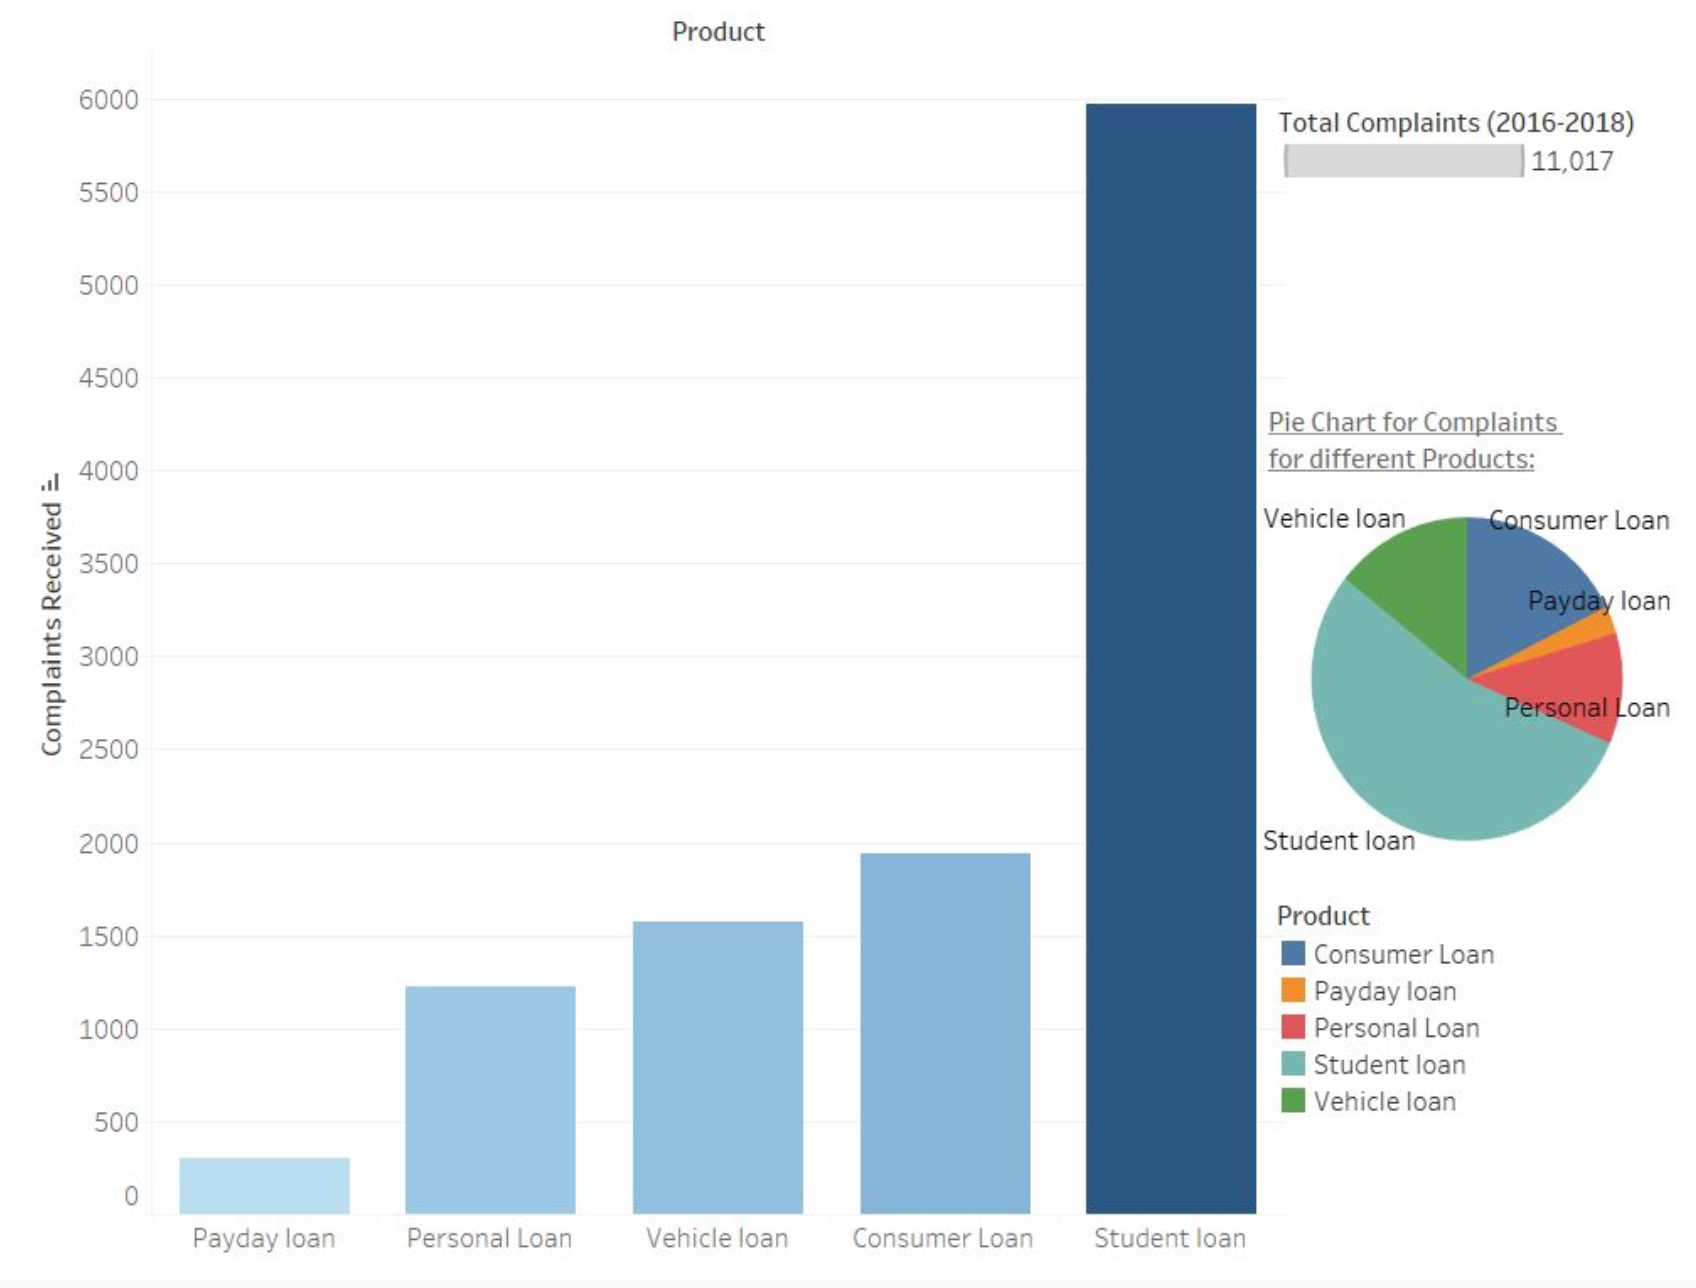

It is evident from the bar graph that the maximum number of complaints that were received were for student loans which were followed by consumer loans and vehicle loans and so on in a proper descending order. We received just over 11,000 complaints for all the products between the years 2016-2018. From the pie chart, we can very clearly see that student loans covered more than 50% of the entire distribution in the pie chart. These were the defining trends for products in the pre-pandemic years.

# Products receiving most complaints during the years 2019-2021
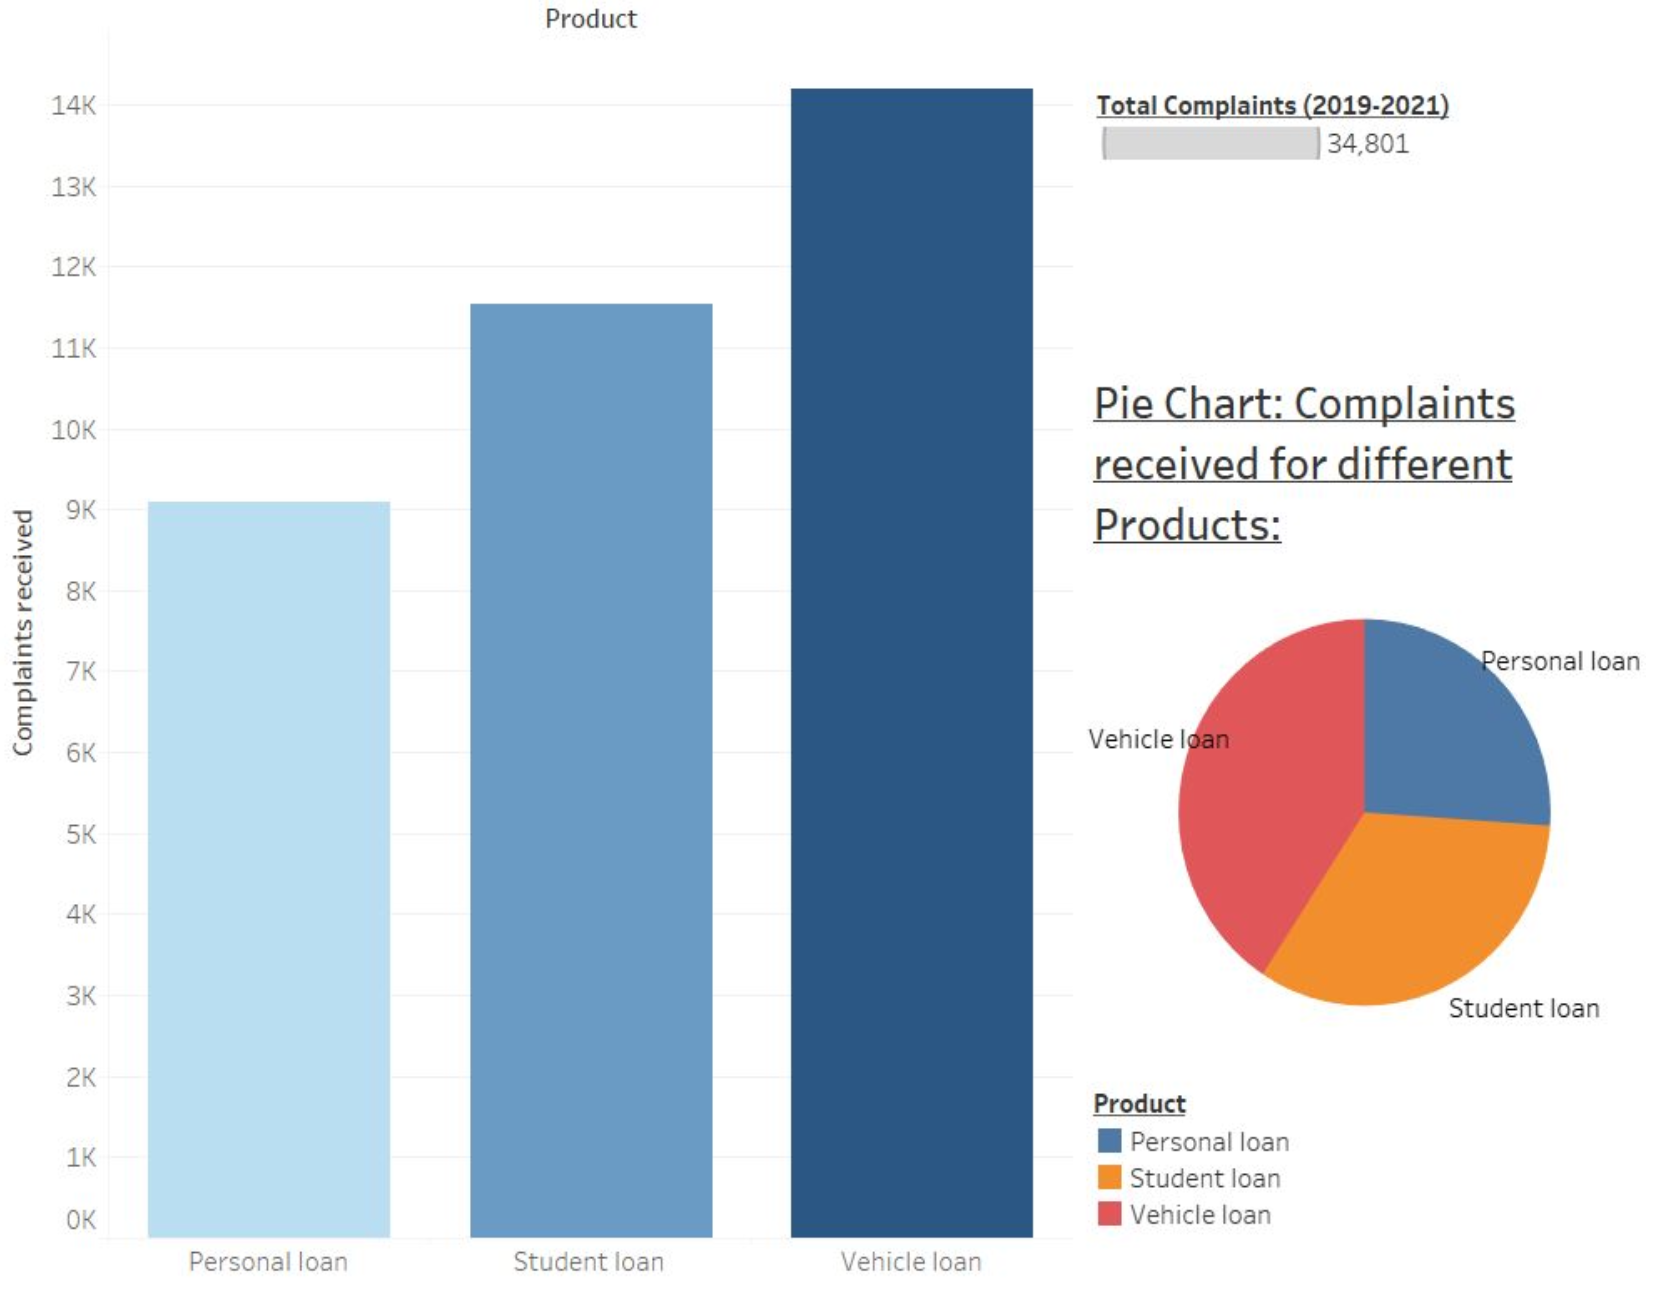


In the years 2019-2021 the complaints were only received for 3 of the 5 loan products but at the same time the number of complaints reported for those products skyrocketed by more than 200% to around 34,000 complaints. Furthermore, in this three-year span vehicle loans replaced student loans as the product receiving the highest number of complaints. The fact that vehicle loans overtook student loans as the product being chosen the most and by extension, receiving more complaints and the total number of complaints for the 3 products in question rose exponentially provided a stark contrast from the previous 3-year analysis.

# Complaints across regions in USA (2016-18)
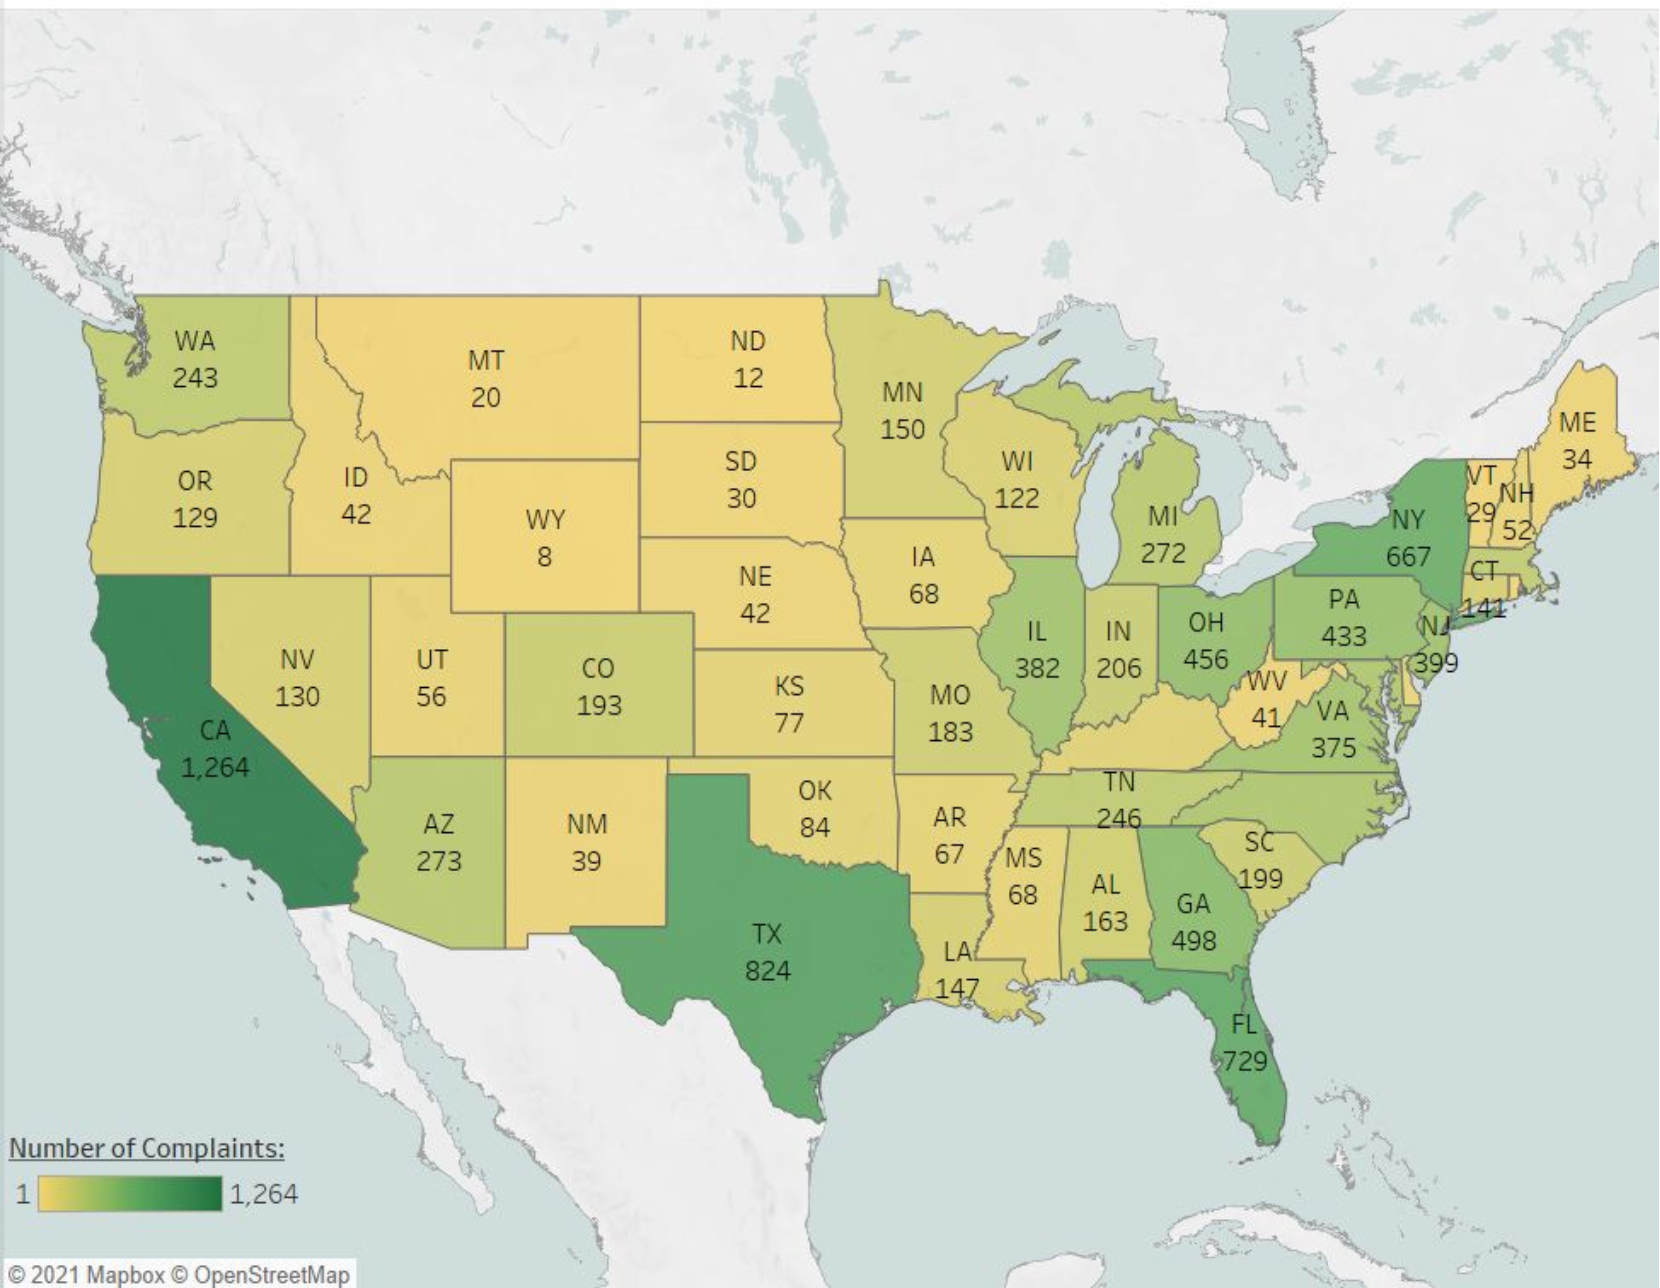


Map is showing the trends and distribution for complaints received per product across different states in USA. From the map it is evident that the states receiving the highest number of complaints were densely populated states like California, Texas, Florida and then other states like Pennsylvania, New York along the eastern coast of the country. California had most complaints with 1,264 complaints reported.

# Complaints across regions in USA (2019-21)
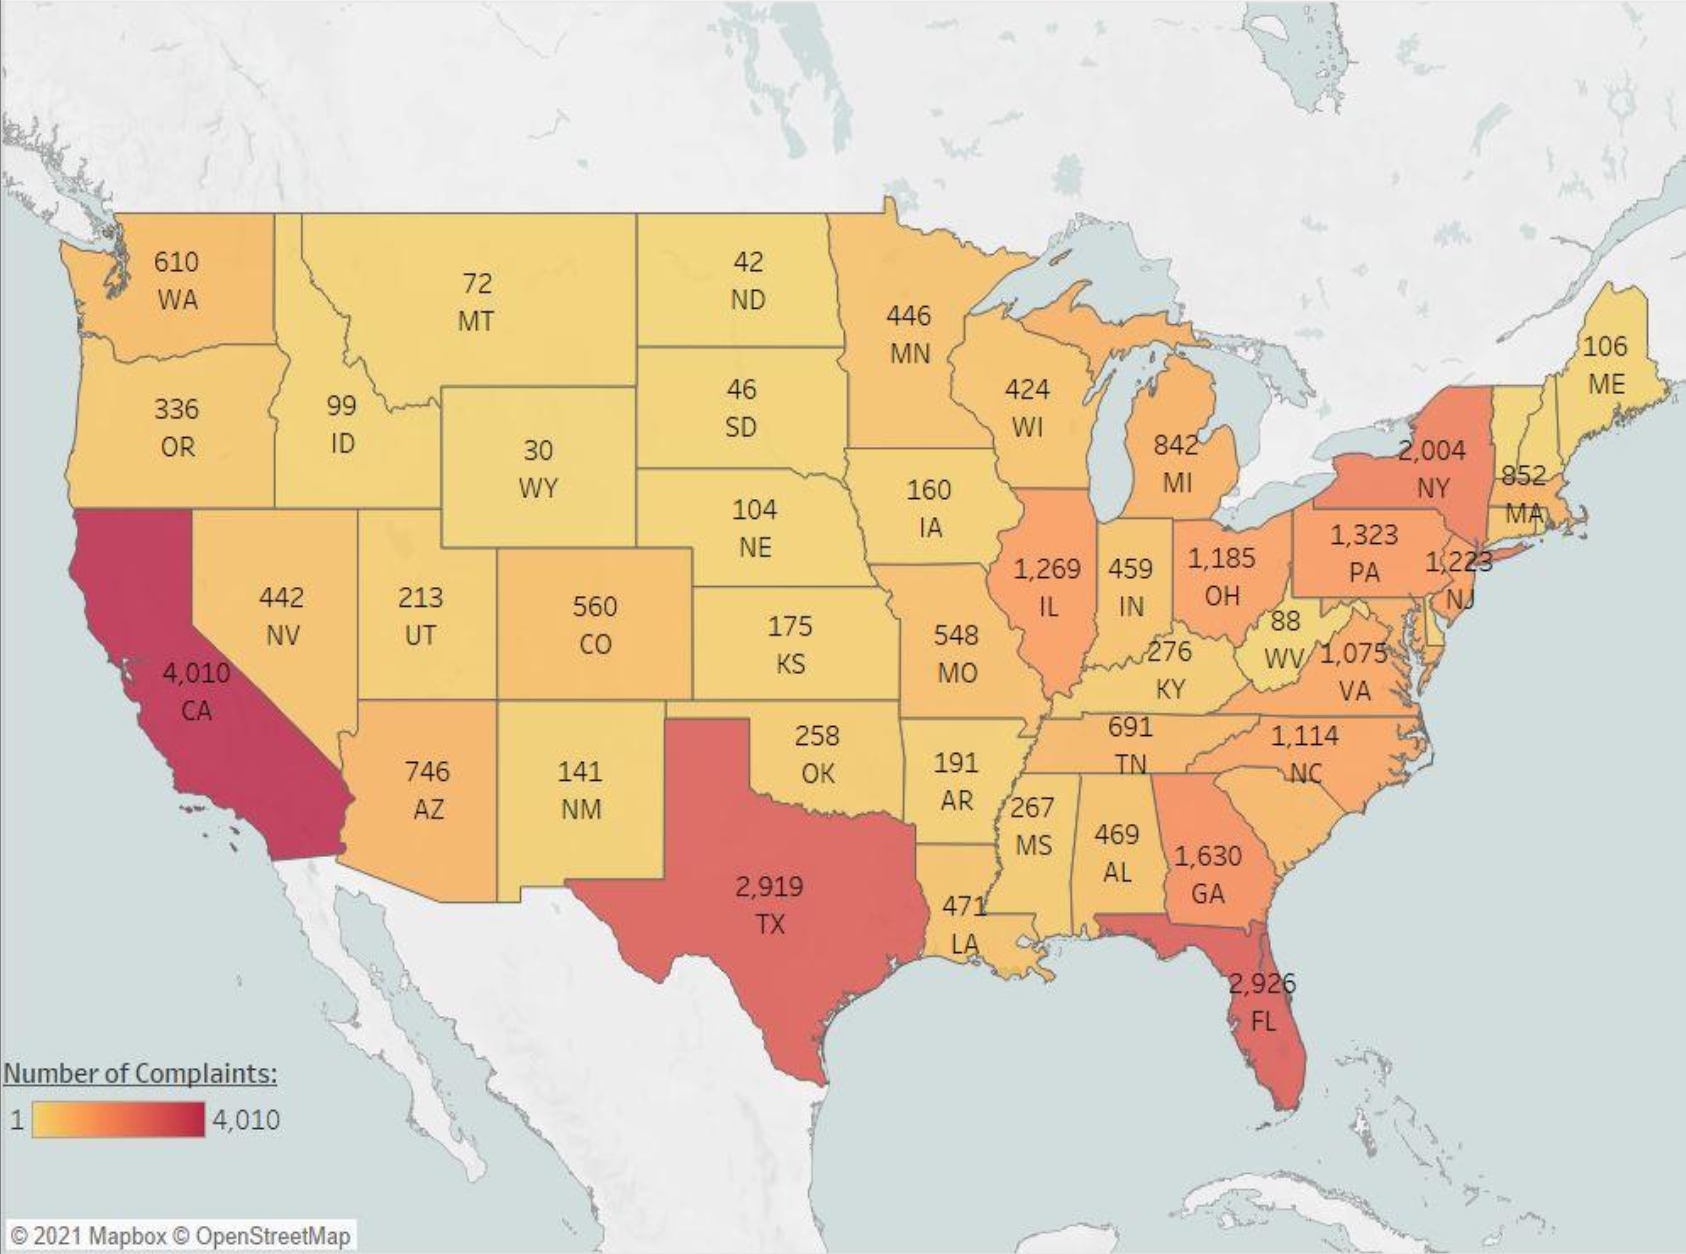


The above map shows in years 2019-2021, the number of products decreasing and the number of complaints increasing significantly did not have a major impact on the state-wise trend. California once again reported most complaints with just over 4000 complaints followed by other states. The rest of the trends were similar to the previous visualization.

### References
To build this interaction we took reference from:
- https://uiuc-ischool-dataviz.github.io/is445_spring2022/week04/
- https://uiuc-ischool-dataviz.github.io/is445_spring2022/week05/, https://uiuc-ischool-dataviz.github.io/is445_spring2022/nbv.html?notebook_name=%2Fis445_spring2022%2Fweek04%2Fspring2019_prep_notebook_week03_part1.ipynb
- https://uiuc-ischool-dataviz.github.io/is445_spring2022/nbv.html?notebook_name=%2Fis445_spring2022%2Fweek04%2Fspring2019_prep_notebook_week03_part2.ipynb
- https://uiuc-ischool-dataviz.github.io/is445_spring2022/nbv.html?notebook_name=%2Fis445_spring2022%2Fweek05%2FinClass_week05.ipynb
- https://uiuc-ischool-dataviz.github.io/is445_spring2022/nbv.html?notebook_name=%2Fis445_spring2022%2Fweek04%2Fprep_notebook_week04.ipynb
- https://uiuc-ischool-dataviz.github.io/is445_spring2022/nbv.html?notebook_name=%2Fis445_spring2022%2Fweek04%2FinClass_week04.ipynb
- https://uiuc-ischool-dataviz.github.io/is445_spring2022/nbv.html?notebook_name=%2Fis445_spring2022%2Fweek05%2Fprep_notebook_week05.ipynb 
- https://uiuc-ischool-dataviz.github.io/is445_spring2022/nbv.html?notebook_name=%2Fis445_spring2022%2Fweek07%2FinClass_week07.ipynb
- https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
- Along with the professors code, I took help from peers.

#### Contextual Visualizations:
All the above visualization were created by us on a data visualization tool Tableau.